In [1]:
from TelescopeML.DataMaster import *
from TelescopeML.DeepTrainer import *
from TelescopeML.Predictor import *
from TelescopeML.IO_utils import load_or_dump_trained_model_CNN
from TelescopeML.StatVisAnalyzer import *

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

# Unsupervised Learning Exploration

This first part is just repeated from the previous tutorials, in order to load the training data to be used in unsupervised learning.

In [2]:
import os 

__reference_data_path__ = os.getenv("TelescopeML_reference_data")
__reference_data_path__ 


# Note: insert the directory of the reference_data if you get an error reading the reference data!!!
# __reference_data_path__ = 'INSERT_DIRECTORY_OF_reference_data'


'C:\\Users\\abhin\\TelescopeML_project\\reference_data'

In [3]:
train_BD = pd.read_csv(os.path.join(__reference_data_path__, 
                                    'training_datasets', 
                                    'browndwarf_R100_v4_newWL_v3.csv.bz2'), compression='bz2')
train_BD.head()

,gravity,temperature,c_o_ratio,metallicity,2.512,2.487,2.462,2.438,2.413,2.389,...,0.981,0.971,0.962,0.952,0.943,0.933,0.924,0.915,0.906,0.897
0,5.0,1100,0.25,-1.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,1.257751e-07,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08
1,5.0,1100,0.25,-0.7,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,1.257751e-07,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08
2,5.0,1100,0.25,-0.5,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,1.257751e-07,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08
3,5.0,1100,0.25,-0.3,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,1.257751e-07,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08
4,5.0,1100,0.25,0.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,1.257751e-07,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08


In [4]:
output_names = ['gravity', 'temperature', 'c_o_ratio', 'metallicity']
train_BD[output_names].head()

,gravity,temperature,c_o_ratio,metallicity
0,5.0,1100,0.25,-1.0
1,5.0,1100,0.25,-0.7
2,5.0,1100,0.25,-0.5
3,5.0,1100,0.25,-0.3
4,5.0,1100,0.25,0.0


In [6]:
wavelength_names = [item for item in train_BD.columns.to_list() if item not in output_names]
wavelength_names[:5]

['2.512', '2.487', '2.462', '2.438', '2.413']

In [7]:
wavelength_values = [float(item) for item in wavelength_names]
wavelength_values[:10]

[2.512, 2.487, 2.462, 2.438, 2.413, 2.389, 2.366, 2.342, 2.319, 2.296]

In [8]:
wl_synthetic = pd.read_csv(os.path.join(__reference_data_path__, 
                                        'training_datasets', 
                                        'wl.csv'))
wl_synthetic.head()

,wl
0,2.511960
1,2.486966
2,2.462220
3,2.437720
4,2.413464


## Prepare Inputs & Outputs

In [9]:
# Training  variables
X = train_BD.drop(
    columns=['gravity', 
             'temperature', 
             'c_o_ratio', 
             'metallicity'])


# Target/Output feature variables
y = train_BD[['gravity', 'c_o_ratio', 'metallicity', 'temperature', ]]

In [10]:
y.loc[:, 'temperature'] = np.log10(y['temperature'])

In [11]:
# check the output variables
y.head()

,gravity,c_o_ratio,metallicity,temperature
0,5.0,0.25,-1.0,3.041393
1,5.0,0.25,-0.7,3.041393
2,5.0,0.25,-0.5,3.041393
3,5.0,0.25,-0.3,3.041393
4,5.0,0.25,0.0,3.041393


In [14]:
# check our input variables table
X.head()

,2.512,2.487,2.462,2.438,2.413,2.389,2.366,2.342,2.319,2.296,...,0.981,0.971,0.962,0.952,0.943,0.933,0.924,0.915,0.906,0.897
0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,8.548790e-08,6.015843e-08,9.539690e-08,7.383212e-08,...,1.257751e-07,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08
1,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,8.548790e-08,6.015843e-08,9.539690e-08,7.383212e-08,...,1.257751e-07,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08
2,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,8.548790e-08,6.015843e-08,9.539690e-08,7.383212e-08,...,1.257751e-07,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08
3,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,8.548790e-08,6.015843e-08,9.539690e-08,7.383212e-08,...,1.257751e-07,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08
4,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,8.548790e-08,6.015843e-08,9.539690e-08,7.383212e-08,...,1.257751e-07,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08


In [15]:
# 104 rows, 30_888 columns
X.shape

(30888, 104)

## PCA

I decided to try Principal Component Analysis first because it's reliable & quick for a first test run. Once I do a first attempt, I can try other methods that may be more time or resource intensive. I chose this approach due to the short deadline (1 week) and computational capabilities (laptop).

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [19]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:5]

array([[-0.31312607, -0.31507733, -0.31761373, -0.32395085, -0.3369144 ,
        -0.35760755, -0.36587906, -0.37099414, -0.36639896, -0.38134039,
        -0.38611028, -0.38779643, -0.37112821, -0.37903271, -0.33094519,
        -0.30793144, -0.28823629, -0.27208209, -0.25980226, -0.26989023,
        -0.27006092, -0.28042034, -0.30365634, -0.31023658, -0.32940748,
        -0.34148938, -0.3361941 , -0.3310189 , -0.31526892, -0.32219609,
        -0.31931609, -0.32911101, -0.33015185, -0.32401318, -0.32274677,
        -0.33217374, -0.32416863, -0.32024413, -0.31086675, -0.33257572,
        -0.32810172, -0.32892751, -0.29389404, -0.30032338, -0.27334418,
        -0.21492982, -0.20578419, -0.23740824, -0.26138444, -0.28465813,
        -0.30499141, -0.31681964, -0.32394721, -0.32138745, -0.31698844,
        -0.32175107, -0.31790998, -0.30612685, -0.32603988, -0.33097194,
        -0.33400312, -0.32920479, -0.34421791, -0.35127925, -0.29316499,
        -0.22697875, -0.20027294, -0.16371611, -0.1

In [21]:
# Dimensionality reduction on X values
pca = PCA()
pca.fit(X_scaled)
pca_data = pca.transform(X_scaled)

In [23]:
# Calculate variances that each PC accounts for
variances = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = [f'PC{i + 1}' for i in range(len(variances))]

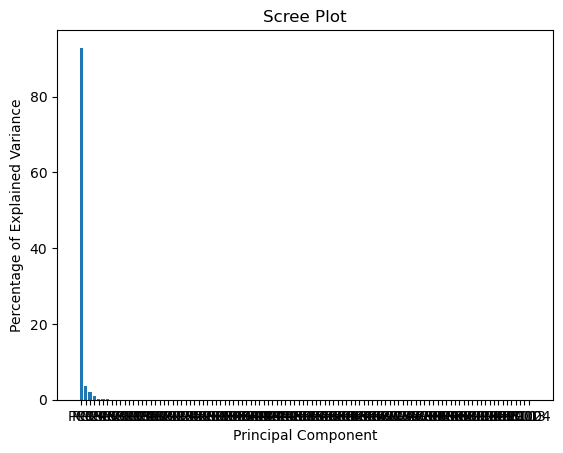

In [24]:
# Plot the percent variances of each PC
plt.bar(x=range(1,len(variances)+1), height=variances, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

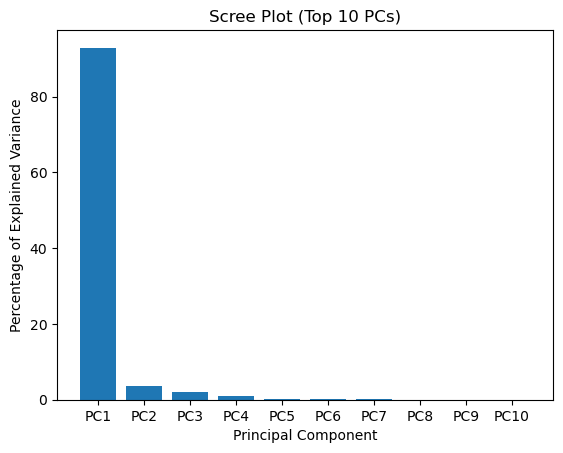

In [25]:
# Since there are a lot of principal components let's look at the top 10
# as the rest don't seem to have any effect at all
plt.bar(x=range(1,11), height=variances[:10], tick_label=labels[:10])
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot (Top 10 PCs)')
plt.show()

In [26]:
variances[0] + variances[1]

96.60000000000001

In [27]:
labels[:5]

['PC1', 'PC2', 'PC3', 'PC4', 'PC5']

Since the first 2 Principal Components account for 96.6% of the variation it should be fine to use these 2 in a 2D plot to eyeball clusters

In [29]:
pca_data.shape

(30888, 104)

Text(0, 0.5, 'PC2 - 3.7%')

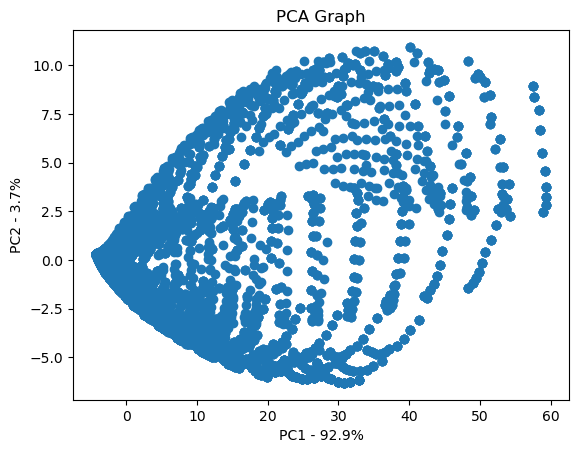

In [33]:
# Unannotated graph to start with
# From here, draw seperate graphs
pca_df = pd.DataFrame(pca_data, index=list(range(30888)), columns=labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA Graph')
plt.xlabel(f'PC1 - {variances[0]}%')
plt.ylabel(f'PC2 - {variances[1]}%')

In [34]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104
0,-3.057954,0.039267,-0.349515,-0.224111,0.05906,-0.208964,-0.173231,-0.092268,-0.193533,0.032331,...,-0.000929,0.000293,-0.000241,-0.000081,0.000119,0.000465,0.000258,0.000294,-0.000029,0.000141
1,-3.057954,0.039267,-0.349515,-0.224111,0.05906,-0.208964,-0.173231,-0.092268,-0.193533,0.032331,...,-0.000929,0.000293,-0.000241,-0.000081,0.000119,0.000465,0.000258,0.000294,-0.000029,0.000141
2,-3.057954,0.039267,-0.349515,-0.224111,0.05906,-0.208964,-0.173231,-0.092268,-0.193533,0.032331,...,-0.000929,0.000293,-0.000241,-0.000081,0.000119,0.000465,0.000258,0.000294,-0.000029,0.000141
3,-3.057954,0.039267,-0.349515,-0.224111,0.05906,-0.208964,-0.173231,-0.092268,-0.193533,0.032331,...,-0.000929,0.000293,-0.000241,-0.000081,0.000119,0.000465,0.000258,0.000294,-0.000029,0.000141
4,-3.057954,0.039267,-0.349515,-0.224111,0.05906,-0.208964,-0.173231,-0.092268,-0.193533,0.032331,...,-0.000929,0.000293,-0.000241,-0.000081,0.000119,0.000465,0.000258,0.000294,-0.000029,0.000141


In [35]:
pca_df.shape

(30888, 104)

In [88]:
# Create a function that plots the PCA Graph but color codes with reference to a certain parameter
# for instance, with temperature, the lowest temperature is the darkest dot.

def plot_PCA_against_single_feature(feature: str):

    arr = y[feature].values
    normalized_values = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))

    plt.scatter(pca_df.PC1, pca_df.PC2, s = 4, c=[(normalized_values[i], normalized_values[i], 0) for i in range(len(pca_df))])
    plt.title(f'PCA Graph - {feature}')
    plt.xlabel(f'PC1 - {variances[0]}%')
    plt.ylabel(f'PC2 - {variances[1]}%')

In [83]:
y.columns

Index(['gravity', 'c_o_ratio', 'metallicity', 'temperature'], dtype='object')

## Observations

Temperature - very concentrated at one point, while it's spread out. Clusters are not as intermingled as other ones but still a little vague, especially since so many of them are concentrated at one area. The best clustering method to use here might be DBSCAN or GMM.

C/O Ratio - arguably the cleanest clusters, being grouped horizontally into almost 4-5 groups. This one could utilize K-means better than others but DBSCAN still seems better still, since there are a lot of points concentrated at the bottom. Tiny bit of overlap, so GMM isn't really necessary here.

Metallicity - clusters are very much intermingling, almost like a rib cage of some sort, where clusters form a straight-ish line approaching from the top/bottom. Here I believe that GMM would be the best course of action, due to it's ability to deal with overlapping clusters. DBSCAN would be the next best bet I believe.

Gravity - similar to metallicity, but the bottom is not like one big cluster; instead, it also alternates between high and low gravity. Again, GMM seems like the best method.

#### OVERALL: Gaussian Mixed Models seem to be the way to go

I plan to try a different dimensionality reduction method later on and see if it forms easier clusters to work with, but with PCA clusters I believe GMMs are the best course of action.

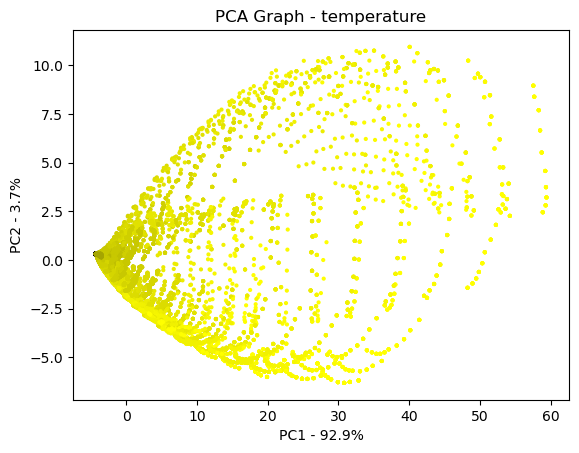

In [89]:
plot_PCA_against_single_feature('temperature')

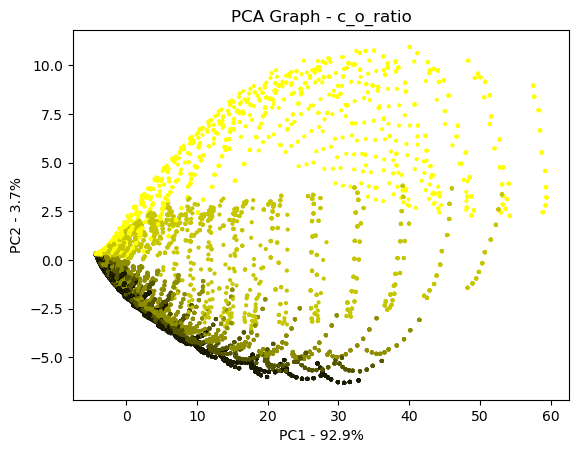

In [90]:
plot_PCA_against_single_feature('c_o_ratio')

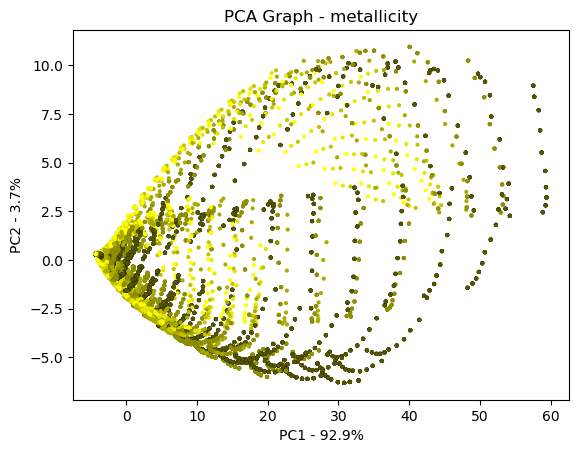

In [91]:
plot_PCA_against_single_feature('metallicity')

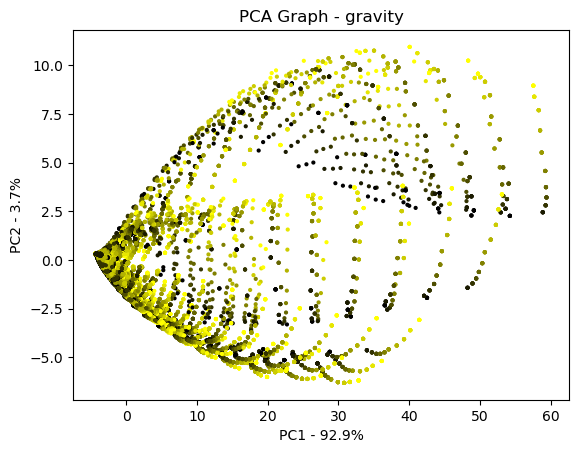

In [92]:
plot_PCA_against_single_feature('gravity')